In [1]:
import pathlib

import yaml

import numpy as np

import itertools

In [2]:
from pixell import enmap, utils as putils

In [3]:
import utilities as u

In [4]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = [12, 8]

csfont = {'fontname':'cmss10'}
font = font_manager.FontProperties(family='Latin Modern Roman',
                                   style='normal', size = 8)


In [5]:
import best
import re

In [6]:
values_file = 'configurations/configILC_plotting_profile.yaml' 
with open(values_file, 'r') as stream:
            data = yaml.safe_load(stream)

In [7]:


plots_directory = data['plotsdirectory']

analysis_directory = data['analysisdirectory']

savingdirectory = data['savingdirectory']

Nsims = data['Nsims']

results_directory = data['resultsdirectory']
spectra_path = data['spectra_path']
sims_directory = data['sims_directory']
WR = u.write_read(sims_directory)

PP = pathlib.Path(analysis_directory)
Pplots = pathlib.Path(plots_directory)

fgnamefiles = data['fgnamefiles']

estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())


lista_lmaxes = []

names = {}

for e in estimators:
    elemento = estimators_dictionary[e]
    names[e] = elemento['direc_name']
    lmax_min, lmax_max = elemento['lmax_min'], elemento['lmax_max']
    num = elemento['number']
    lista_lmaxes += [np.linspace(lmax_min, lmax_max, num, dtype = int)]

lmaxes_configs = list(itertools.product(*lista_lmaxes))


#CHOOSE nu
nu = estimators_dictionary[estimators[0]]['nu']

In [8]:
estimators

['hu_ok', 'shear', 'bh', 'pbh', 'symm', 'symmbh']

In [9]:
noisetag = data['noisekey']
trispectrumtag = data['trispectrumkey']
primarytag = data['primarykey']
secondarytag = data['secondarykey']
primarycrosstag = data['primarycrosskey']

lmin_sel, lmax_sel = data['lmin_sel'], data['lmax_sel']

optversion = data['optversion']

In [10]:
colors_ests = {}
labels_ests = {}
for e in estimators:
    colors_ests[e] = estimators_dictionary[e]['color']
    labels_ests[e] = estimators_dictionary[e]['label']

In [11]:
noisebiasconstr = False

In [12]:
get_dir = lambda h, s, b, p, sy, sybh: f'h{h}s{s}b{b}p{p}sy{sy}sybh{sybh}'

In [13]:
l = 3500

In [14]:
kk = np.load(pathlib.Path(analysis_directory)/get_dir(l, l, l, l, l, l)/'kk_ilc.npy')
theta = np.load(pathlib.Path(analysis_directory)/get_dir(l, l, l, l, l, l)/'theta_ilc.npy')
ells = np.load(pathlib.Path(analysis_directory)/get_dir(l, l, l, l, l, l)/'ells_ilc.npy')
selection = (ells > 30) & (ells < 1200)

In [15]:
resultspath = pathlib.Path(results_directory)

In [16]:
paperplots = pathlib.Path('paperplots/')

In [17]:
fnb_getter = lambda Opt, fb_val, invvar: Opt.get_f_n_b(Opt.ells_selected, Opt.theory_selected, Opt.theta_selected, Opt.biases_selected,
                              sum_biases_squared = False, bias_squared = False, fb = fb_val, inv_variance = invvar)

In [18]:
def get_est_weights(Opt, index):
    '''
    index = 0, 1, ....
    e.g. h, s, b -> index = 1 gives s
    '''
    Nest = len(Opt.estimators)
    nbins = Opt.nbins
    zeros = np.zeros(Nest*nbins)
    for j in range(nbins):
        zeros[index+Nest*j:index+(Nest*j+1)] = 1.
    return zeros

In [19]:
fb = 1.
invvariance = False
noisebiasconstr = False

In [20]:
analysis_directory_ref = 'output_ILC_1102'

In [21]:
reference_directory = pathlib.Path(analysis_directory_ref)/'h4000s4000b4000p4000sypbh4000sybh4000/total/'

kk = np.load(reference_directory/'kk_total_ilc.npy')
theta = np.load(reference_directory/'theta_total_ilc.npy')
ells = np.load(reference_directory/'ells_total_ilc.npy')
selection = (ells > 30) & (ells < 1200)
biases = np.load(reference_directory/'totalbias_total_ilc.npy')
noises = np.load(reference_directory/'N_total_ilc.npy')
estimators_reference = ['h', 's', 'b', 'p', 'sy', 'sybh']
Optimizerkk = best.Opt(estimators_reference, lmin_sel, lmax_sel, ells, kk, theta, biases, noises)
#x_estimator = get_est_weights(Optimizerkk, index = 0)
#f, n, b = fnb_getter(Optimizerkk, fb, True)
#f_ref, n_ref, b_ref = f(x_estimator), n(x_estimator), b(x_estimator)

In [22]:
reference_directory

PosixPath('output_ILC_1102/h4000s4000b4000p4000sypbh4000sybh4000/total')

In [23]:
Nells = len(ells)

In [24]:
directory = pathlib.Path('resultssumfg_ILC_1503_newreg/b4000sybh3500p3500sy4500/')
directory = pathlib.Path('resultssumfg_ILC_1503_newreg/b4000sybh3500p3500sy4000/')
directory = pathlib.Path('resultssumfg_ILC_1503_newreg/b4000sybh3500p4500sy4000/')

In [28]:
all_configs = []
all_its = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
all_scales =  [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

all_crosses = [0.75, 0.85, 0.9, 0.92, 0.95, 1.0]

for i in all_its:
    for s in all_scales:
        for c in all_crosses:
            all_configs += [(i, s, c)]

In [36]:
all_scales = [0.8]
cross = 0.92

7.146761621843586e-05
7.146820362118196e-05
7.14672464263495e-05
7.146795458884653e-05
7.146811022109516e-05
7.146808461325113e-05
7.146813411288181e-05
7.146798624810079e-05
7.146756938769521e-05
7.146798160801067e-05


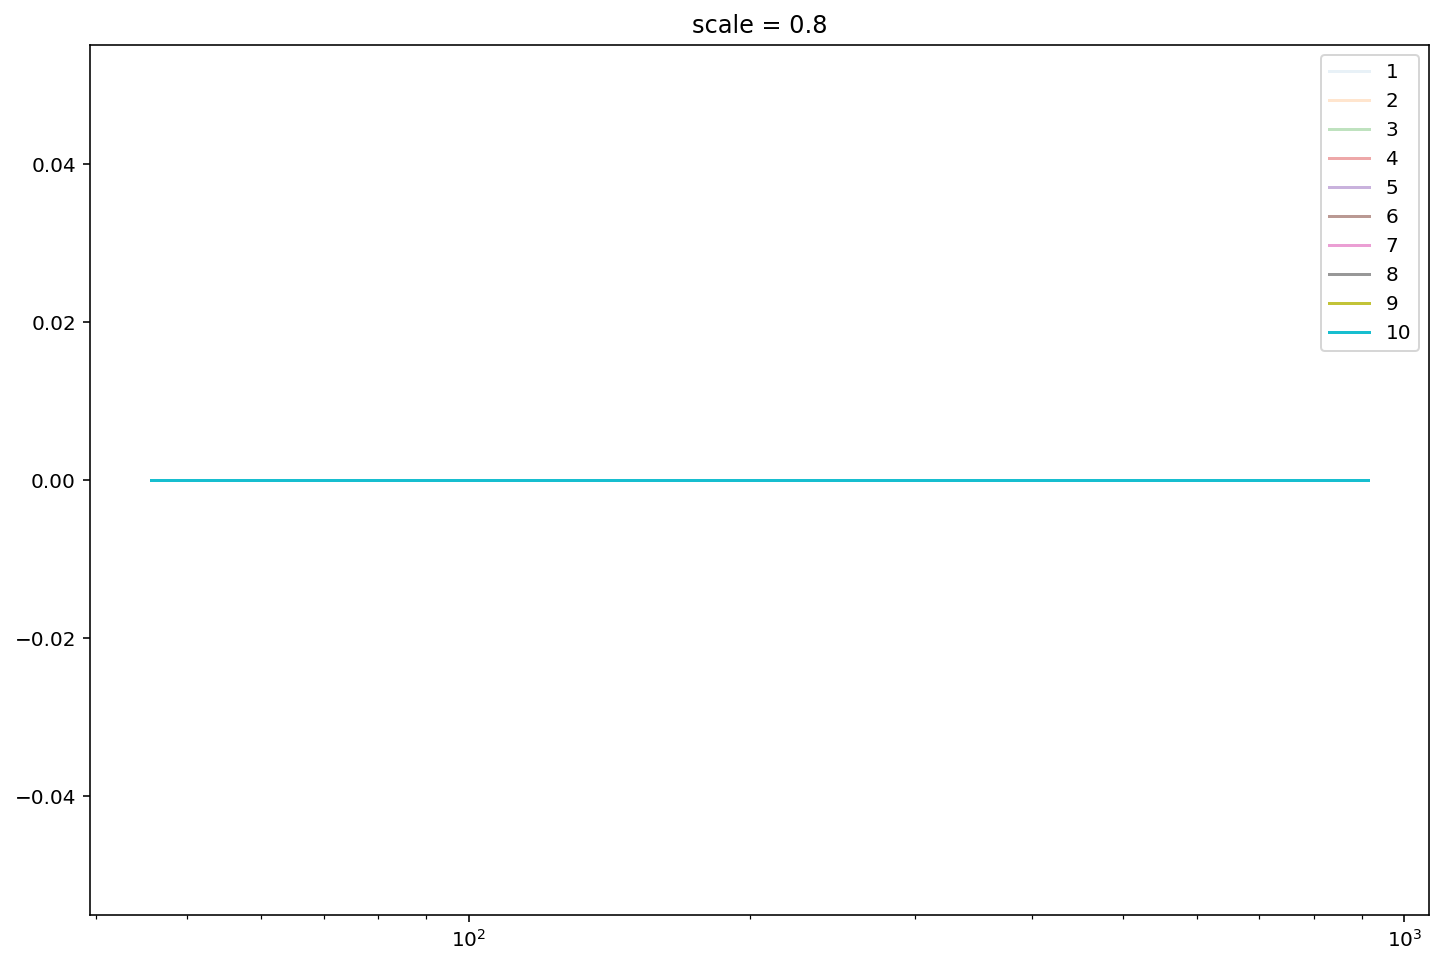

In [43]:
for scale in all_scales:
    plt.title(f'scale = {scale}')
    for i in all_its:
        ws = np.load(directory/f'w_auto_fb_1.0_scale_{scale}_cross_{cross}_it_{i}_nonregularised.npy')
        ells = ws[0]
        wplot = ws[2]
        sel = wplot<1e-3
        #wplot[sel] = 0.
        #print(wplot)
        plt.plot(ells, wplot, label = i, alpha = 0.1*i)
        ells = ws[0]
        
        alens = np.load(directory/f'alens_scale_{scale}_cross_{cross}_it_{i}_nonregularised.npy')
        print(alens[0, 0])
        
    plt.legend(loc = 'best')
    plt.xscale('log')
    plt.show()

In [122]:
direc = pathlib.Path('resultssumfg_ILC_1503_non_reg/b3000sybh3000p3000sy3000/')

In [130]:
historyv2 = np.load(direc/'h_auto_fb_1.0.npy')

In [129]:
#historyv1

In [131]:
historyv1[:, -1]

array([0.00069307, 0.00069307, 0.00069307, ..., 0.00010555, 0.00010555,
       0.00010555])

In [132]:
historyv2[:, -1]

array([0.00072609, 0.00072609, 0.00072609, ..., 0.00010393, 0.00010393,
       0.00010393])

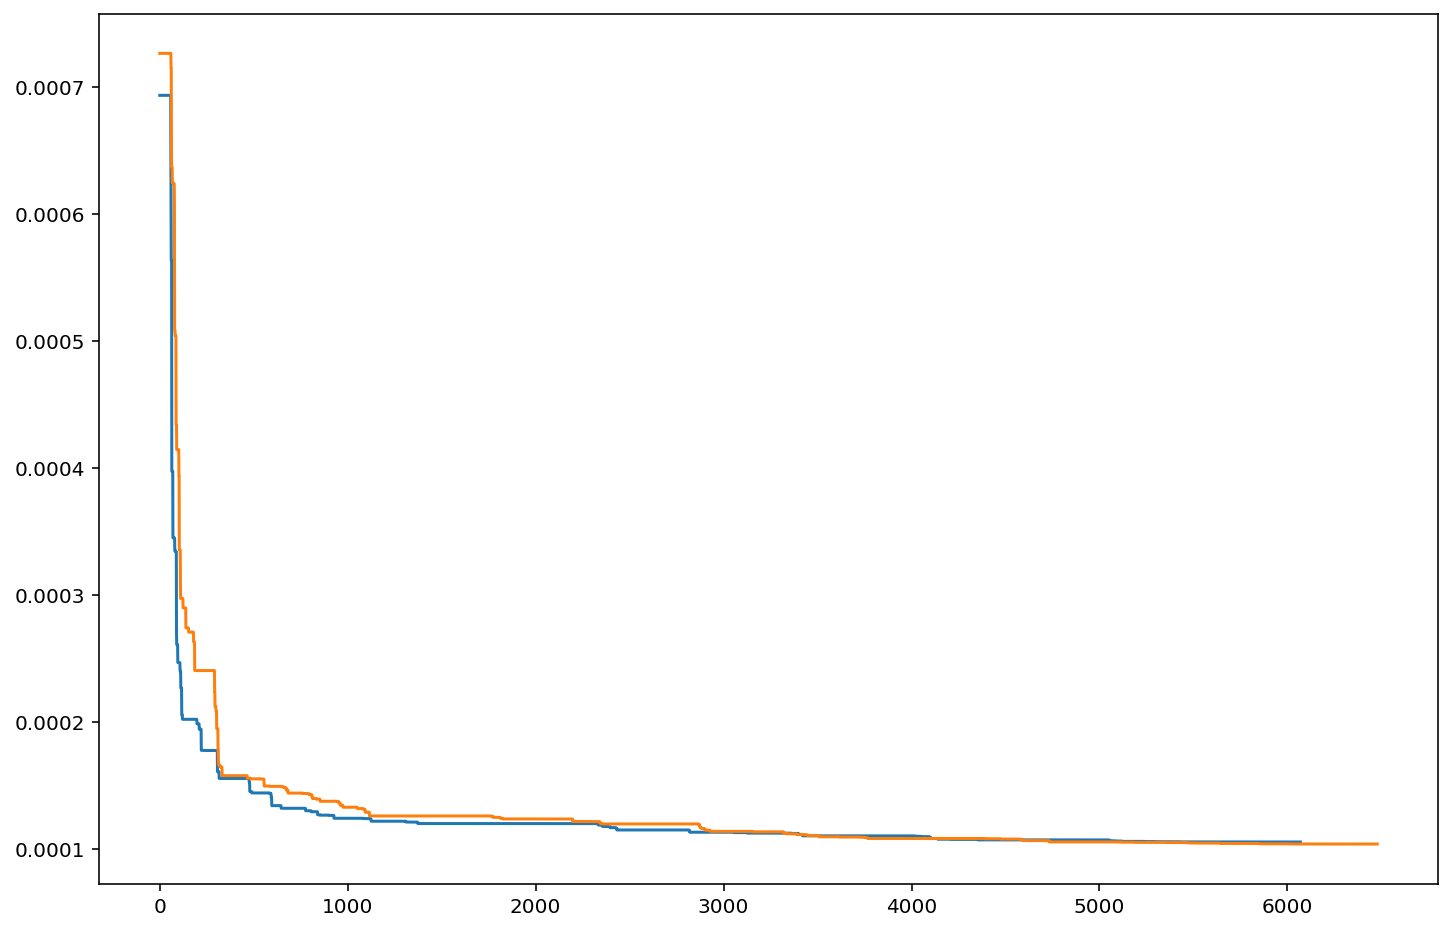

In [138]:
plt.plot(historyv1[:, -1])
plt.plot(historyv2[:, -1])